# Discovering Penguin Diversity in Antarctica

![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [10]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## Exploratory Data Analysis
To start, let's explore the data and understand its structure and distribution. We'll use K-means clustering to identify natural groupings of penguin data.

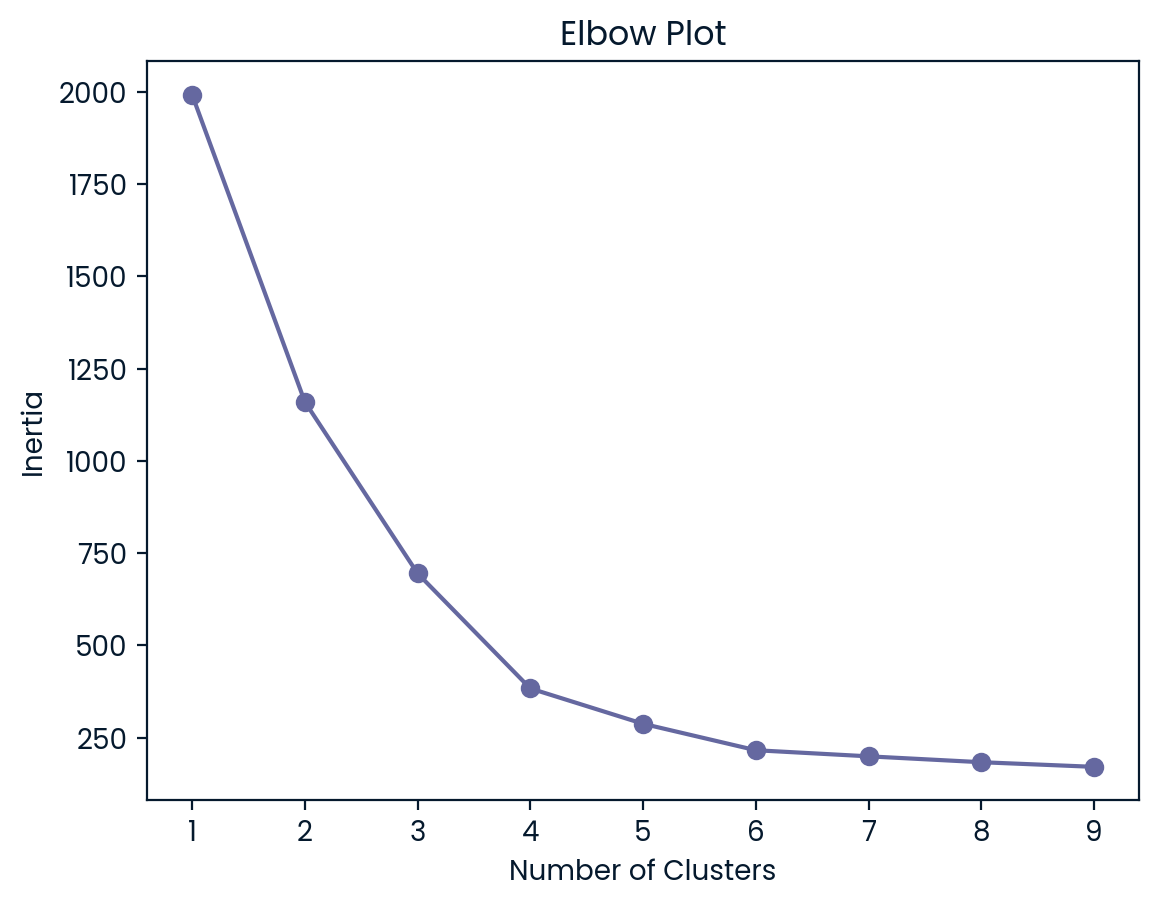

In [11]:
# Preprocessing: One-hot encode categorical 'sex' column
penguins = pd.get_dummies(penguins_df)

# Standardize the features
scaler = StandardScaler()
penguins_scaled = pd.DataFrame(scaler.fit_transform(penguins), columns=penguins.columns)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(penguins_scaled)
    inertia.append(model.inertia_)
    
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

## Clustering Analysis
Based on the Elbow plot, we select 4 clusters as they offer a balance between model complexity and variance explained.

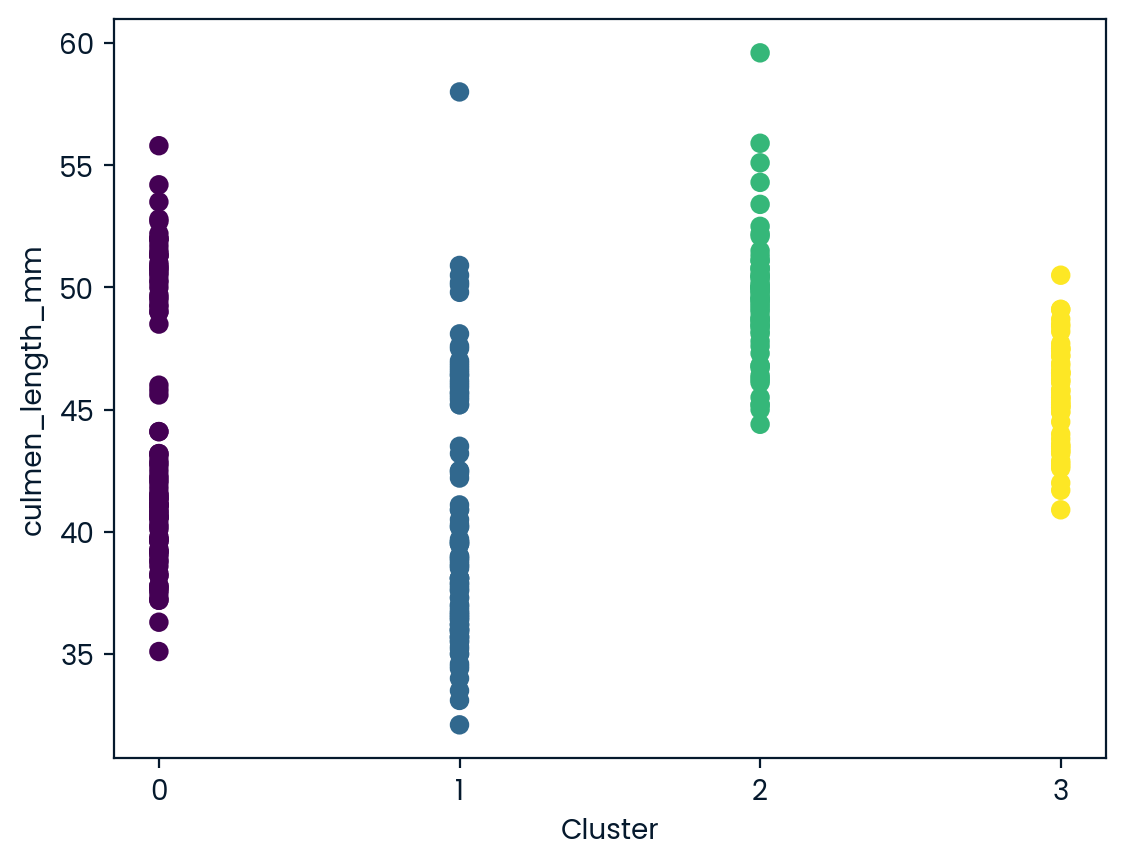

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             43.878302        19.111321         194.764151  4006.603774
1             40.217757        17.611215         189.046729  3419.158879
2             49.473770        15.718033         221.540984  5484.836066
3             45.563793        14.237931         212.706897  4679.741379


In [12]:
# Perform K-means clustering with selected number of clusters
model = KMeans(n_clusters=4, random_state=42)
model.fit(penguins_scaled)

# Assign cluster labels to original dataset
penguins['label'] = model.labels_

# Visualize clusters based on culmen length
plt.scatter(penguins['label'], penguins['culmen_length_mm'], c=model.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins['label'].min()), int(penguins['label'].max()) + 1))
plt.show()

# Analyze cluster characteristics
stat_penguins = penguins.drop(['sex_MALE', 'sex_FEMALE'], axis=True).groupby('label').mean()
print(stat_penguins)

## Principal Component Analysis (PCA)
To better understand the variance in the data and reduce dimensionality, we'll apply PCA and visualize the results.

Explained variance by components: [5.20340616e-01 3.44631118e-01 8.58556863e-02 3.22911959e-02
 1.68813837e-02 3.39957056e-33]
Total explained variance: 1.0000000000000002


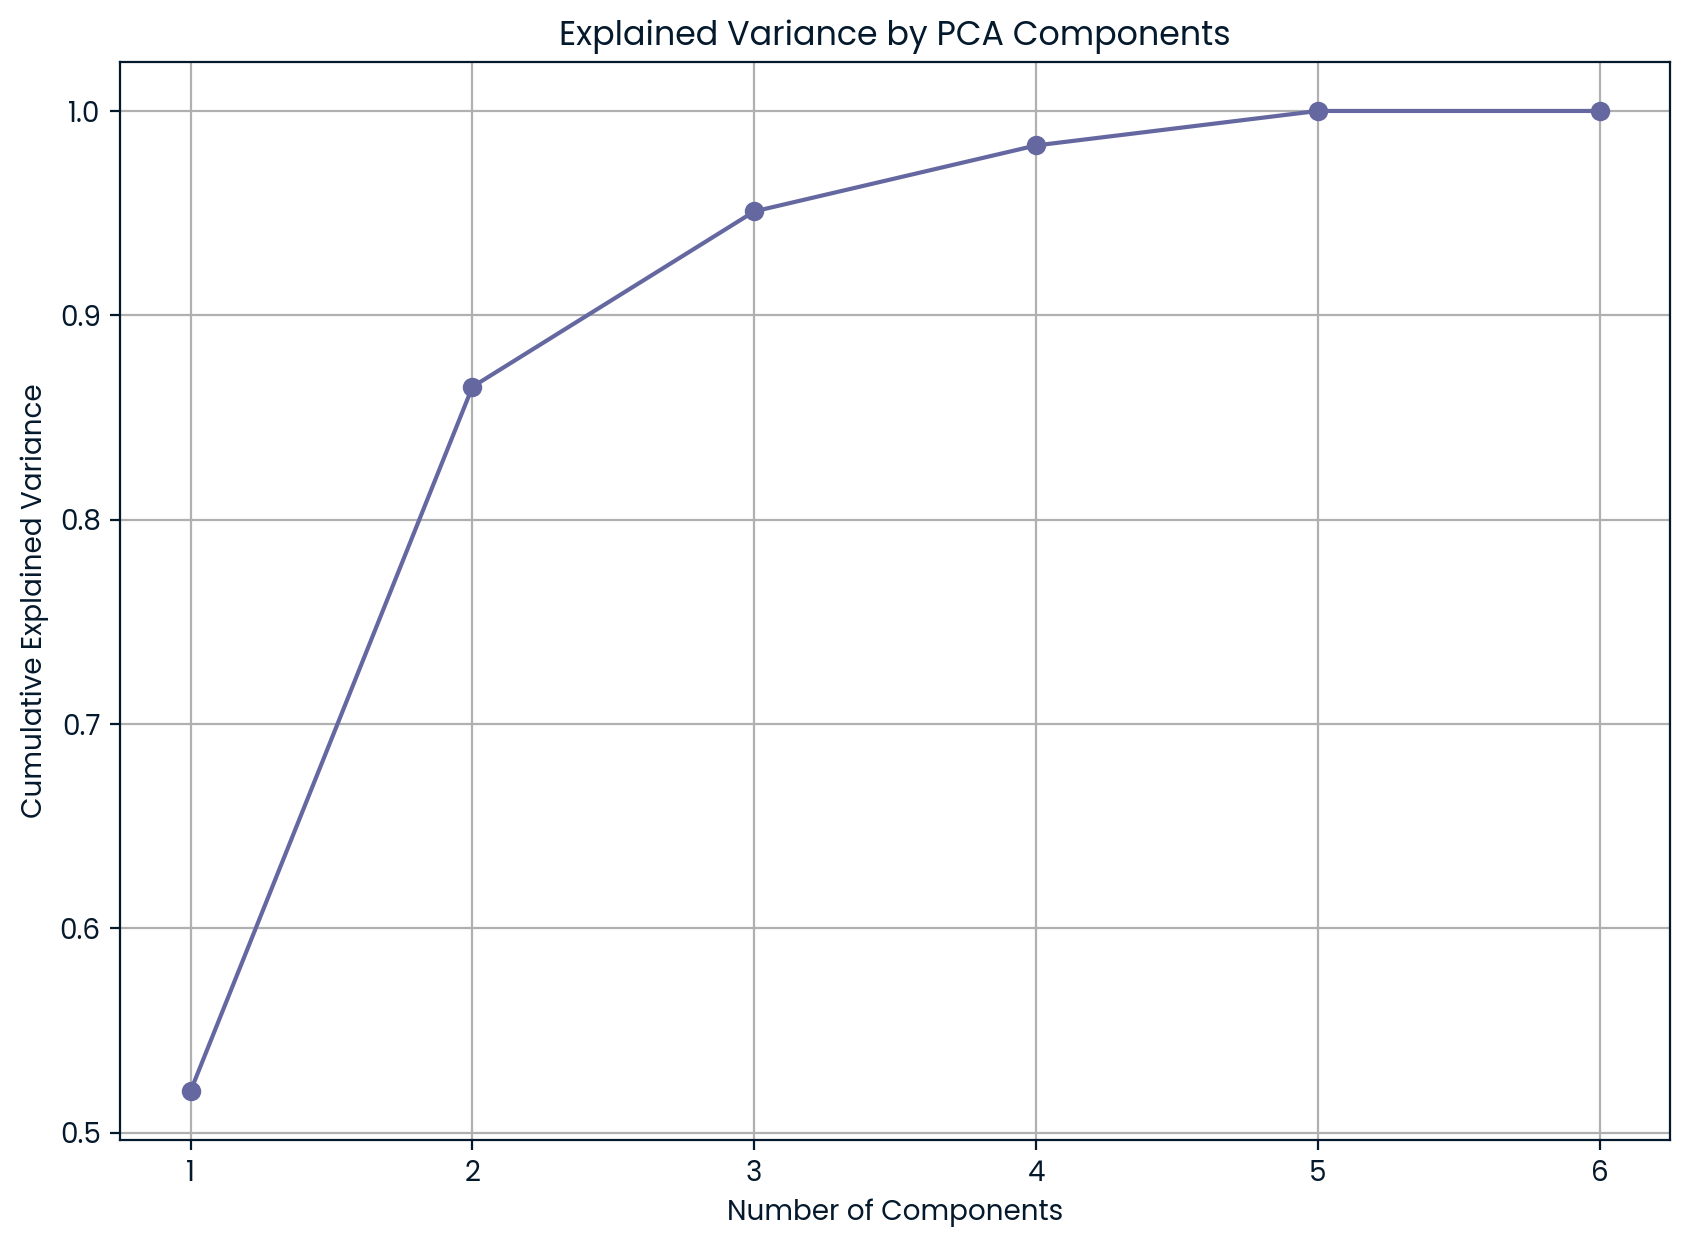

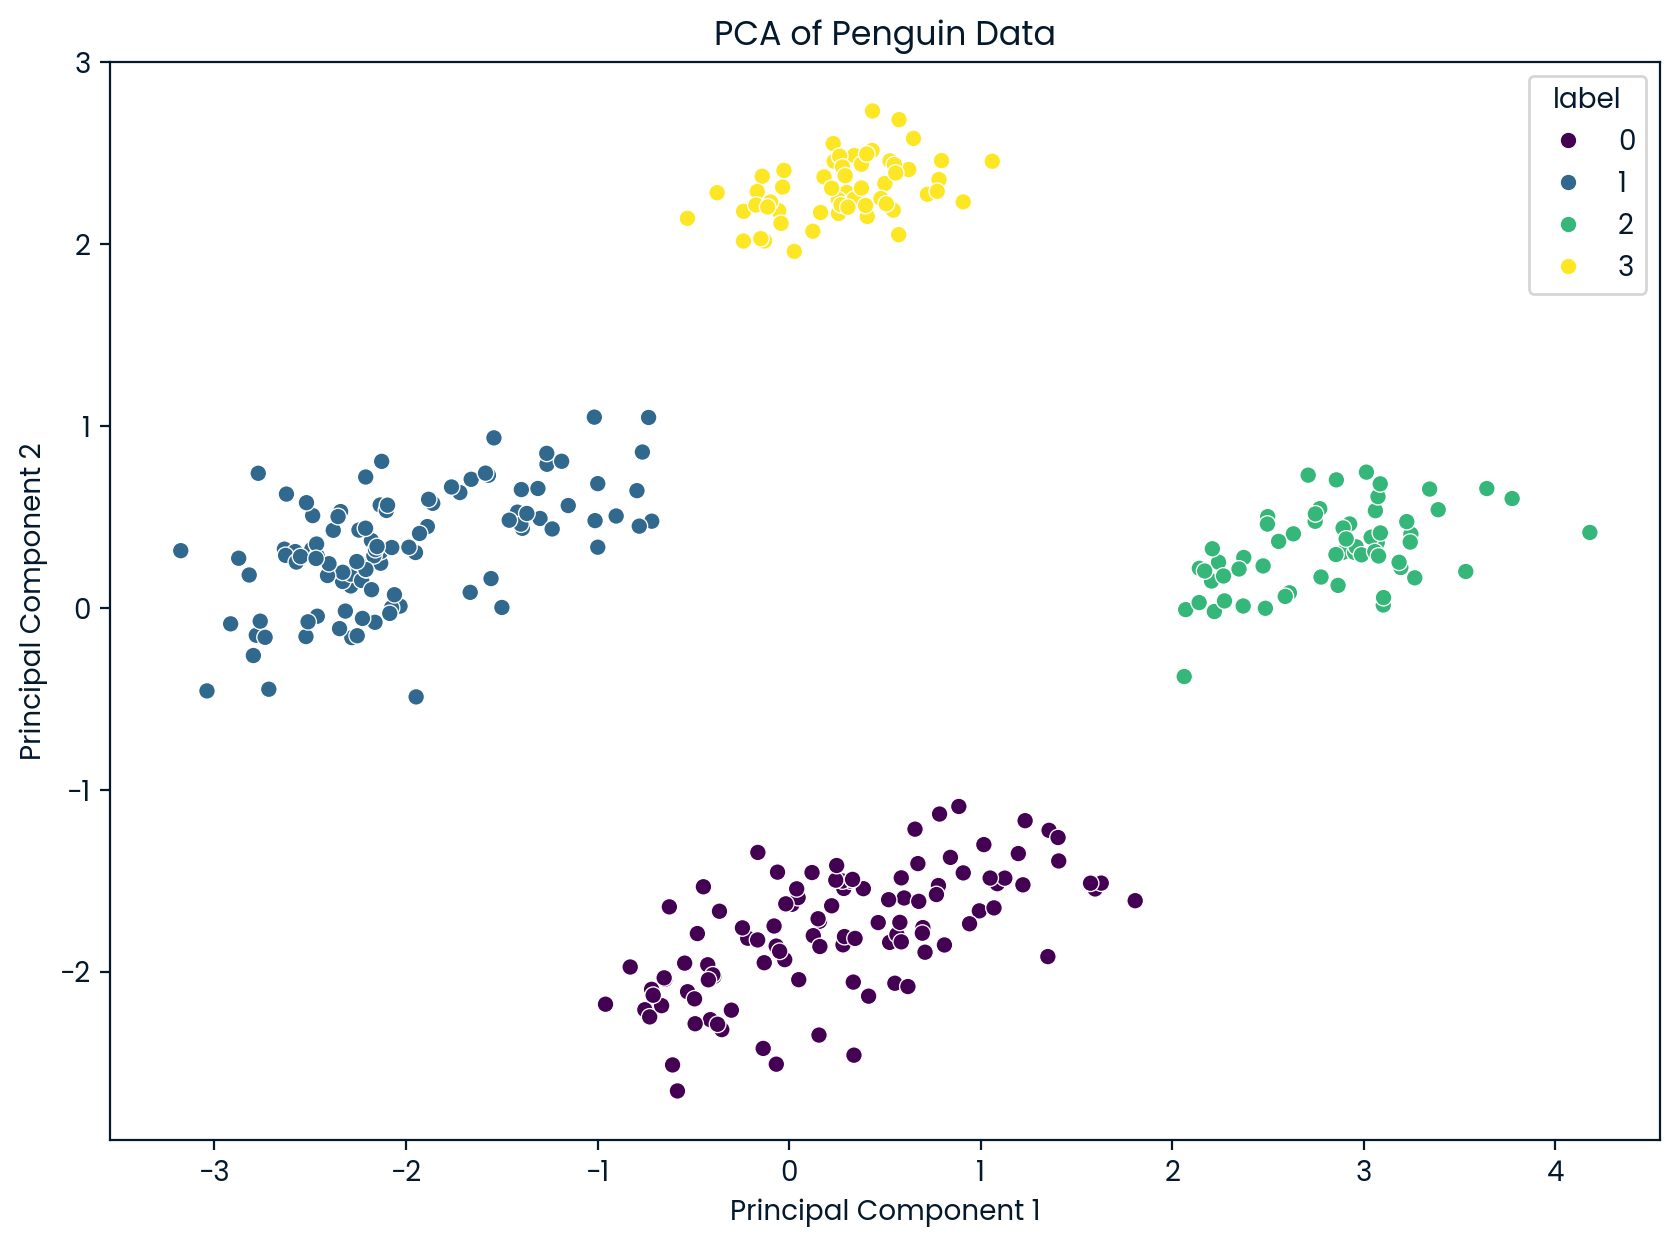

In [13]:
# Apply PCA
pca = PCA()
penguins_pca = pca.fit_transform(penguins_scaled)

# Check the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by components: {explained_variance}')
print(f'Total explained variance: {explained_variance.sum()}')

# Plot the explained variance ratio
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Apply PCA with an appropriate number of components
pca = PCA(n_components=2)
penguins_pca = pca.fit_transform(penguins_scaled)

# Plot PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=penguins_pca[:,0], y=penguins_pca[:,1], hue=penguins['label'], palette='viridis')
plt.title('PCA of Penguin Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Cluster Insights
Here are the average characteristics of penguins within each cluster:

- Cluster 0: Culmen length around 43.88 mm, moderate body mass and flipper length.
- Cluster 1: Shorter culmen length (around 40.22 mm) and lower body mass.
- Cluster 2: Longer culmen length (around 49.47 mm), significantly higher body mass and flipper length.
- Cluster 3: Moderate culmen length (around 45.56 mm) with relatively high body mass and flipper length.

These insights suggest potential species distinctions based on morphological attributes.